## Load and prepare the data

In [6]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE

RANDOM_STATE = 42

# Load the dataset
df = pd.read_csv('dataset/credit-evaluation.csv')

# Handling missing values
imputer = SimpleImputer(strategy='median')
df[df.columns] = imputer.fit_transform(df)

# Split the data
X = df.drop(['TARGET', 'id'], axis=1)
y = df['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RANDOM_STATE)

# Balance the training data using SMOTE
smote = SMOTE(random_state=RANDOM_STATE)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

## What the models would perform the best in this dataset?

In [7]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.ensemble import AdaBoostClassifier, HistGradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import xgboost as xgb

# List of models to evaluate
models = [
    ("AdaBoost", AdaBoostClassifier()),
    ("HistGradientBoosting", HistGradientBoostingClassifier()),
    ("RandomForest", RandomForestClassifier()),
    ("LogisticRegression", LogisticRegression(max_iter=1000)),
    ("KNeighbors", KNeighborsClassifier()),
    ("MLPClassifier", MLPClassifier(max_iter=1000)),
    ("SVC", SVC()),
    ("DecisionTree", DecisionTreeClassifier()),
    ("ExtraTree", ExtraTreeClassifier()),
    ("DummyClassifier", DummyClassifier(strategy='stratified')),
    ("XGBoost", xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
]

# DataFrame to store the results
results_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

# Evaluating each model
for name, model in models:
    model.fit(X_train_balanced, y_train_balanced)
    y_pred = model.predict(X_test)
    print(name)
    print(classification_report(y_test, y_pred))
    print("----\n\n")
    report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
    results_df = results_df.append({
        'Model': name,
        'Accuracy': report['accuracy'],
        'Precision': report['1.0']['precision'],
        'Recall': report['1.0']['recall'],
        'F1-Score': report['1.0']['f1-score']
    }, ignore_index=True)

# Sorting by different metrics
sorted_by_accuracy = results_df.sort_values('Accuracy', ascending=False)
sorted_by_precision = results_df.sort_values('Precision', ascending=False)
sorted_by_recall = results_df.sort_values('Recall', ascending=False)
sorted_by_f1 = results_df.sort_values('F1-Score', ascending=False)

# Displaying the sorted results
print("Sorted by Accuracy:\n", sorted_by_accuracy)
print("\nSorted by Precision:\n", sorted_by_precision)
print("\nSorted by Recall:\n", sorted_by_recall)
print("\nSorted by F1-Score:\n", sorted_by_f1)

AdaBoost
              precision    recall  f1-score   support

         0.0       0.84      0.93      0.88      4986
         1.0       0.23      0.10      0.14      1014

    accuracy                           0.79      6000
   macro avg       0.54      0.52      0.51      6000
weighted avg       0.73      0.79      0.76      6000

----


HistGradientBoosting
              precision    recall  f1-score   support

         0.0       0.84      0.98      0.90      4986
         1.0       0.41      0.06      0.11      1014

    accuracy                           0.83      6000
   macro avg       0.63      0.52      0.51      6000
weighted avg       0.77      0.83      0.77      6000

----


RandomForest
              precision    recall  f1-score   support

         0.0       0.84      0.97      0.90      4986
         1.0       0.35      0.07      0.12      1014

    accuracy                           0.82      6000
   macro avg       0.59      0.52      0.51      6000
weighted avg     

**Overall Best Performers**:

-   **HistGradientBoosting** remains a strong performer in terms of accuracy and precision <u>but has lower recall and F1-scores</u>.
-   **XGBoost** and **RandomForest** show a good balance between accuracy and F1-score.
-   **MLPClassifier**, **SVC**, and **Logistic Regression** have lower accuracy but much higher recall and **F1-scores**, suggesting improved identification of the positive class at the expense of more false positives.

## Models for train
For my training, I chose **XGboost**, **Random Forest**, and the classic, well-known **Logistic Regression**

## **Logistic Regression**

### Train **LogisticRegression** with different hyperparameters

#### What `C` performs better?

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

C = [0.001, 0.01, 0.1, 1, 10, 100]

for c in C:
    log_reg_model = LogisticRegression(C=c, solver='liblinear', max_iter=1000)
    log_reg_model.fit(X_train_balanced, y_train_balanced)
    log_reg_predictions = log_reg_model.predict(X_test)

    # Evaluate the model
    print(f"Logistic Regression with C={c}")
    print(classification_report(y_test, log_reg_predictions))

Logistic Regression with C=0.001
              precision    recall  f1-score   support

         0.0       0.87      0.62      0.72      4986
         1.0       0.22      0.54      0.32      1014

    accuracy                           0.61      6000
   macro avg       0.55      0.58      0.52      6000
weighted avg       0.76      0.61      0.65      6000

Logistic Regression with C=0.01
              precision    recall  f1-score   support

         0.0       0.87      0.62      0.72      4986
         1.0       0.22      0.54      0.32      1014

    accuracy                           0.61      6000
   macro avg       0.55      0.58      0.52      6000
weighted avg       0.76      0.61      0.65      6000

Logistic Regression with C=0.1
              precision    recall  f1-score   support

         0.0       0.87      0.62      0.72      4986
         1.0       0.22      0.54      0.32      1014

    accuracy                           0.61      6000
   macro avg       0.55      0.5

#### What solver performs better?

In [11]:
for solver in ['liblinear', 'saga']:
    log_reg_model = LogisticRegression(C=0.1, solver='liblinear', max_iter=1000)
    log_reg_model.fit(X_train_balanced, y_train_balanced)
    log_reg_predictions = log_reg_model.predict(X_test)

    # Evaluate the model
    print(f"Logistic Regression with solver: {solver}")
    print(classification_report(y_test, log_reg_predictions))

Logistic Regression with solver: liblinear
              precision    recall  f1-score   support

         0.0       0.87      0.62      0.72      4986
         1.0       0.22      0.54      0.32      1014

    accuracy                           0.61      6000
   macro avg       0.55      0.58      0.52      6000
weighted avg       0.76      0.61      0.65      6000

Logistic Regression with solver: saga
              precision    recall  f1-score   support

         0.0       0.87      0.62      0.72      4986
         1.0       0.22      0.54      0.32      1014

    accuracy                           0.61      6000
   macro avg       0.55      0.58      0.52      6000
weighted avg       0.76      0.61      0.65      6000



There seems to be no difference at all 🤷‍♂️

### Find the best parameters and get the best model with **GridSearchCV**

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Set up the hyperparameter grid
log_reg_params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

# Create the model instance
log_reg = LogisticRegression(max_iter=1000)

# Perform grid search
log_reg_cv = GridSearchCV(log_reg, log_reg_params, cv=5, scoring='f1')
log_reg_cv.fit(X_train_balanced, y_train_balanced)

# Best parameters and best score
print("Best parameters for Logistic Regression:", log_reg_cv.best_params_)
print("Best score:", log_reg_cv.best_score_)

Best parameters for Logistic Regression: {'C': 1, 'solver': 'liblinear'}
Best score: 0.5469947262770838


              precision    recall  f1-score   support

         0.0       0.87      0.62      0.72      4986
         1.0       0.22      0.54      0.32      1014

    accuracy                           0.61      6000
   macro avg       0.55      0.58      0.52      6000
weighted avg       0.76      0.61      0.65      6000



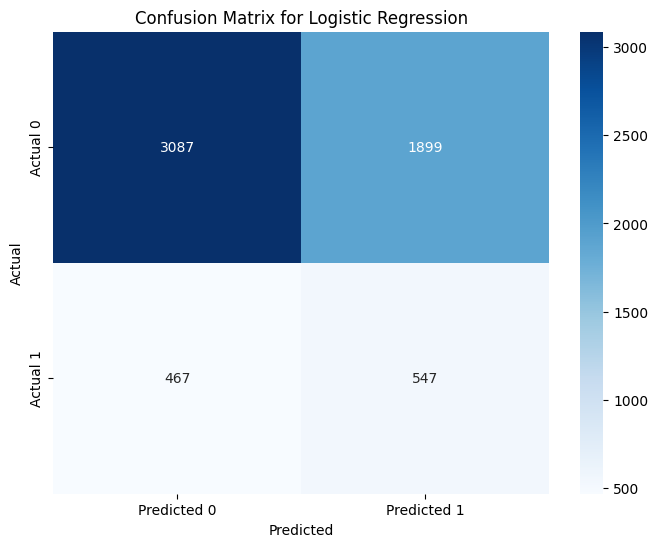

In [17]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

log_reg_predictions = log_reg_cv.best_estimator_.predict(X_test)

print(classification_report(y_test, log_reg_predictions))

cm = confusion_matrix(y_test, log_reg_predictions)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title(f'Confusion Matrix for Logistic Regression')
plt.show()

### Save the best Logistic Regression model

In [14]:
import joblib

joblib.dump(log_reg_cv.best_estimator_, 'models/logistic_regression_model.pkl')

['logistic_regression_model.pkl']

## **Random Forest**

### Train **RandomForest** with different hyperparameters

#### What numbers of estimators performs better?


In [21]:
from sklearn.ensemble import RandomForestClassifier

for n_estimators in [10, 20, 50, 100, 200, 300]:
    random_forest_model = RandomForestClassifier(n_estimators=n_estimators, max_depth=20)
    random_forest_model.fit(X_train_balanced, y_train_balanced)
    rf_predictions = random_forest_model.predict(X_test)

    # Evaluate the model
    print(f"RandomForest Classification Report with n_estimators={n_estimators}")
    print(classification_report(y_test, rf_predictions))

RandomForest Classification Report with n_estimators=10
              precision    recall  f1-score   support

         0.0       0.84      0.92      0.88      4986
         1.0       0.23      0.12      0.16      1014

    accuracy                           0.78      6000
   macro avg       0.54      0.52      0.52      6000
weighted avg       0.74      0.78      0.76      6000

RandomForest Classification Report with n_estimators=20
              precision    recall  f1-score   support

         0.0       0.84      0.94      0.89      4986
         1.0       0.27      0.10      0.15      1014

    accuracy                           0.80      6000
   macro avg       0.55      0.52      0.52      6000
weighted avg       0.74      0.80      0.76      6000

RandomForest Classification Report with n_estimators=50
              precision    recall  f1-score   support

         0.0       0.84      0.96      0.90      4986
         1.0       0.31      0.09      0.13      1014

    accuracy  

#### What max depth is more optimal?

In [22]:
from sklearn.ensemble import RandomForestClassifier

for max_depth in [2, 3, 5, 10, 20, 50]:
    random_forest_model = RandomForestClassifier(n_estimators=100, max_depth=max_depth)
    random_forest_model.fit(X_train_balanced, y_train_balanced)
    rf_predictions = random_forest_model.predict(X_test)

    # Evaluate the model
    print(f"RandomForest Classification Report with max_depth={max_depth}")
    print(classification_report(y_test, rf_predictions))

RandomForest Classification Report with max_depth=2
              precision    recall  f1-score   support

         0.0       0.86      0.72      0.78      4986
         1.0       0.22      0.40      0.29      1014

    accuracy                           0.66      6000
   macro avg       0.54      0.56      0.53      6000
weighted avg       0.75      0.66      0.70      6000

RandomForest Classification Report with max_depth=3
              precision    recall  f1-score   support

         0.0       0.86      0.76      0.81      4986
         1.0       0.24      0.37      0.29      1014

    accuracy                           0.69      6000
   macro avg       0.55      0.56      0.55      6000
weighted avg       0.75      0.69      0.72      6000

RandomForest Classification Report with max_depth=5
              precision    recall  f1-score   support

         0.0       0.85      0.89      0.87      4986
         1.0       0.29      0.21      0.25      1014

    accuracy              

#### What the `min_samples_split` is the best?

In [24]:
from sklearn.ensemble import RandomForestClassifier

for min_samples_split in [2, 5, 7, 10]:
    random_forest_model = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=min_samples_split)
    random_forest_model.fit(X_train_balanced, y_train_balanced)
    rf_predictions = random_forest_model.predict(X_test)

    # Evaluate the model
    print(f"RandomForest Classification Report with min_samples_split={min_samples_split}")
    print(classification_report(y_test, rf_predictions))

RandomForest Classification Report with min_samples_split=2
              precision    recall  f1-score   support

         0.0       0.84      0.97      0.90      4986
         1.0       0.32      0.07      0.11      1014

    accuracy                           0.82      6000
   macro avg       0.58      0.52      0.50      6000
weighted avg       0.75      0.82      0.77      6000

RandomForest Classification Report with min_samples_split=5
              precision    recall  f1-score   support

         0.0       0.84      0.97      0.90      4986
         1.0       0.36      0.07      0.12      1014

    accuracy                           0.82      6000
   macro avg       0.60      0.52      0.51      6000
weighted avg       0.76      0.82      0.77      6000

RandomForest Classification Report with min_samples_split=7
              precision    recall  f1-score   support

         0.0       0.84      0.97      0.90      4986
         1.0       0.36      0.08      0.13      1014

  

### Find the best parameters and get the best model with **GridSearchCV**

Best parameters for RandomForest: {'max_depth': 30, 'min_samples_split': 5, 'n_estimators': 200}
Best score: 0.7874173018853414
              precision    recall  f1-score   support

         0.0       0.84      0.97      0.90      4986
         1.0       0.34      0.07      0.11      1014

    accuracy                           0.82      6000
   macro avg       0.59      0.52      0.50      6000
weighted avg       0.75      0.82      0.77      6000



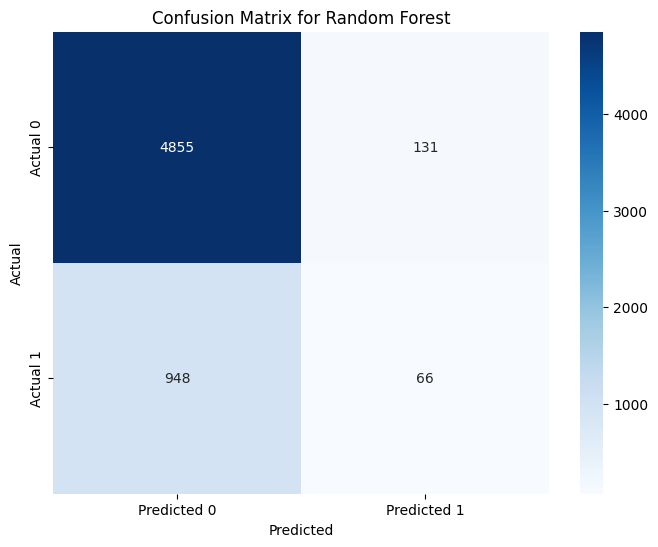

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Hyperparameter grid
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [5, 7, 10]
}

# Model instance
random_forest = RandomForestClassifier()

# Grid search
rf_cv = GridSearchCV(random_forest, rf_params, cv=5, scoring='f1')
rf_cv.fit(X_train_balanced, y_train_balanced)

# Best parameters and score
print("Best parameters for RandomForest:", rf_cv.best_params_)
print("Best score:", rf_cv.best_score_)

rf_predictions = rf_cv.best_estimator_.predict(X_test)

print(classification_report(y_test, rf_predictions))

cm = confusion_matrix(y_test, rf_predictions)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title(f'Confusion Matrix for Random Forest')
plt.show()

### Save the best **Random Forest** model

In [26]:
import joblib

joblib.dump(rf_cv.best_estimator_, 'models/random_forest_model.pkl')

['random_forest_model.pkl']

## **XGBoost**

### Train **XGBoost** with different hyperparameters

#### What the numbers of estimators performs better?

In [27]:
for n_estimators in [50, 100, 200, 300]:
    # Create XGBoost model with specified hyperparameters
    xgboost_model = xgb.XGBClassifier(n_estimators=n_estimators)
    xgboost_model.fit(X_train_balanced, y_train_balanced)
    xgb_predictions = xgboost_model.predict(X_test)

    # Evaluate the model
    print(f"XGBoost Classification Report with n_estimators={n_estimators}")
    print(classification_report(y_test, xgb_predictions))

XGBoost Classification Report with n_estimators=50
              precision    recall  f1-score   support

         0.0       0.84      0.97      0.90      4986
         1.0       0.40      0.08      0.14      1014

    accuracy                           0.82      6000
   macro avg       0.62      0.53      0.52      6000
weighted avg       0.76      0.82      0.77      6000

XGBoost Classification Report with n_estimators=100
              precision    recall  f1-score   support

         0.0       0.84      0.96      0.90      4986
         1.0       0.39      0.11      0.18      1014

    accuracy                           0.82      6000
   macro avg       0.61      0.54      0.54      6000
weighted avg       0.77      0.82      0.78      6000

XGBoost Classification Report with n_estimators=200
              precision    recall  f1-score   support

         0.0       0.84      0.95      0.89      4986
         1.0       0.32      0.11      0.17      1014

    accuracy               

#### What max depth is more optimal?

In [28]:
for max_depth in [3, 5, 7, 10, 20]:
    # Create XGBoost model with specified hyperparameters
    xgboost_model = xgb.XGBClassifier(n_estimators=100, max_depth=max_depth)
    xgboost_model.fit(X_train_balanced, y_train_balanced)
    xgb_predictions = xgboost_model.predict(X_test)

    # Evaluate the model
    print(f"XGBoost Classification Report with max_depth={max_depth}")
    print(classification_report(y_test, xgb_predictions))

XGBoost Classification Report with max_depth=3
              precision    recall  f1-score   support

         0.0       0.83      0.99      0.91      4986
         1.0       0.41      0.04      0.07      1014

    accuracy                           0.83      6000
   macro avg       0.62      0.51      0.49      6000
weighted avg       0.76      0.83      0.76      6000

XGBoost Classification Report with max_depth=5
              precision    recall  f1-score   support

         0.0       0.84      0.98      0.90      4986
         1.0       0.41      0.07      0.12      1014

    accuracy                           0.83      6000
   macro avg       0.62      0.53      0.51      6000
weighted avg       0.77      0.83      0.77      6000

XGBoost Classification Report with max_depth=7
              precision    recall  f1-score   support

         0.0       0.84      0.95      0.89      4986
         1.0       0.32      0.11      0.16      1014

    accuracy                           0.

#### What the learning rate is the best?

In [31]:
for learning_rate in [0.001, 0.01, 0.03, 0.1, 0.3, 1]:
    # Create XGBoost model with specified hyperparameters
    xgboost_model = xgb.XGBClassifier(n_estimators=100, max_depth=5, learning_rate=learning_rate)
    xgboost_model.fit(X_train_balanced, y_train_balanced)
    xgb_predictions = xgboost_model.predict(X_test)

    # Evaluate the model
    print(f"XGBoost Classification Report with learning_rate={learning_rate}")
    print(classification_report(y_test, xgb_predictions))

XGBoost Classification Report with learning_rate=0.001
              precision    recall  f1-score   support

         0.0       0.83      1.00      0.91      4986
         1.0       0.00      0.00      0.00      1014

    accuracy                           0.83      6000
   macro avg       0.42      0.50      0.45      6000
weighted avg       0.69      0.83      0.75      6000

XGBoost Classification Report with learning_rate=0.01
              precision    recall  f1-score   support

         0.0       0.83      1.00      0.91      4986
         1.0       0.50      0.00      0.00      1014

    accuracy                           0.83      6000
   macro avg       0.67      0.50      0.45      6000
weighted avg       0.78      0.83      0.75      6000

XGBoost Classification Report with learning_rate=0.03
              precision    recall  f1-score   support

         0.0       0.83      1.00      0.91      4986
         1.0       0.58      0.02      0.03      1014

    accuracy       

### Find the best parameters and get the best model with **GridSearchCV**

Best parameters for XGBoost: {'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 150}
Best score: 0.7662635746025097
              precision    recall  f1-score   support

         0.0       0.84      0.98      0.90      4986
         1.0       0.35      0.05      0.08      1014

    accuracy                           0.82      6000
   macro avg       0.59      0.51      0.49      6000
weighted avg       0.75      0.82      0.76      6000



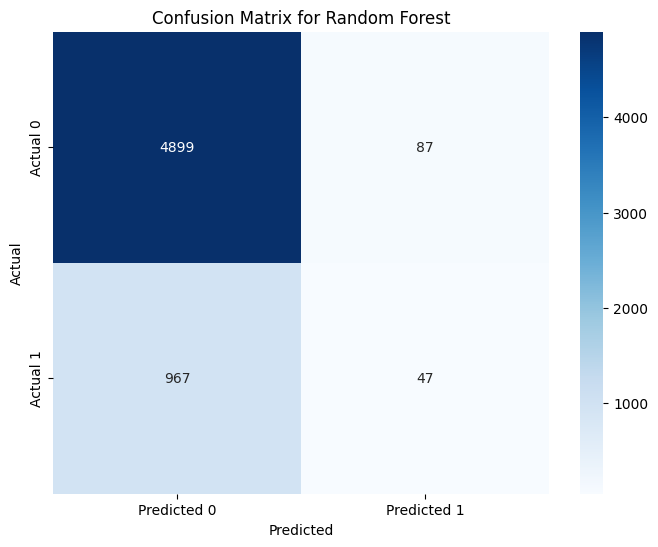

In [34]:
import xgboost as xgb

# Hyperparameter grid
xgb_params = {
    'n_estimators': [75, 100, 150],
    'learning_rate': [0.2, 0.3, 0.4],
    'max_depth': [4, 5, 6]
}

# Model instance
xgboost = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Grid search
xgb_cv = GridSearchCV(xgboost, xgb_params, cv=5, scoring='f1')
xgb_cv.fit(X_train_balanced, y_train_balanced)

# Best parameters and score
print("Best parameters for XGBoost:", xgb_cv.best_params_)
print("Best score:", xgb_cv.best_score_)

xgb_predictions = xgb_cv.best_estimator_.predict(X_test)

print(classification_report(y_test, xgb_predictions))

cm = confusion_matrix(y_test, xgb_predictions)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title(f'Confusion Matrix for Random Forest')
plt.show()

### Save the best **XGBoost** model

In [35]:
xgb_cv.best_estimator_.save_model('models/xgboost_model.bin')